<a href="https://colab.research.google.com/github/dhilipkumar2/GRIP-Internship-Task-4/blob/main/Task_4_Exploratory_Data_Analysis_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GRIP @ THE SPARKS FOUNDATION

DATA SCIENCE AND BUSINESS ANALYTICS INTERN

Task 4- Exploratory Data Analysis-Terrorism

By- DHILIP KUMAR D

Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

As a security/defense analyst, try to find out the hot zone of terrorism.

What all security issues and insights you can derive by EDA?

Import the required Libraries

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")
import os
import mpl_toolkits
import json
print('Libraries are imported Successfully')

Libraries are imported Successfully


Import the dataset

In [74]:
df=pd.read_csv('/content/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

In [75]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18865,198305240006,1983,5,24,NaN,0,NaN,45,Colombia,3,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
18866,198305240007,1983,5,24,NaN,0,NaN,45,Colombia,3,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
18867,198305240008,1983,5,24,NaN,0,NaN,145,Nicaragua,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
18868,198305240009,1983,5,24,NaN,0,NaN,145,Nicaragua,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN


Cleaning or pre-processing of data

In [76]:
usecols= [1, 5, 8, 10, 11, 12, 13, 14, 25, 26, 27, 29, 35, 58, 69, 71, 82, 98, 100, 101, 103, 104, 106]
renamescols= {
      'iyear': 'uyear',
       'country_txt' : 'country_txtt',
        'region_txt' : 'region_txtt',
         'latitude': 'lat',
          'longittude': 'long',
         'provstate':  'provsstate',
          'attacktype1_txt' : 'attackedtype1',
          'targtypet1_txt' : 'targettype1',
           'weaptype1_txt' :  'weapontype',
            'nperps' : 'nperhps',
             'nkill' : 'nkilled',
             'nkillter': 'nkilledter',
             'nwound' : 'nwounded',
             'nwondte': 'nwondedte',
              'propextent_txt' : 'propertyextent'
          
     
}

In [77]:
#read dataset
df =pd.read_csv('/content/globalterrorismdb_0718dist.csv',encoding= 'ISO-8859-1', usecols=usecols)
df.rename(columns=renamescols, inplace =True)
print('Data read Successfully')

Data read Successfully


In [78]:
#remove unknown values
df=df[pd.notnull(df.lat)]
df=df[pd.notnull(df.longitude)]
print("Unknown values are removed from the columns")

Unknown values are removed from the columns


In [79]:
#count of duplicate values
df.duplicated().sum()

2628

In [80]:
#check null values
df.isnull().sum()

uyear                 0
extended              0
country_txtt          0
region_txtt           0
provsstate           81
city                  0
lat                   0
longitude             0
multiple              0
success               0
suicide               0
attackedtype1         0
targtype1_txt         0
gname                 0
nperhps           14504
claimed           17176
weapontype            0
nkilled            3320
nkilledter        16609
nwounded           4825
nwoundte          16762
property              0
propertyextent     9670
dtype: int64

In [81]:
#delete duplicate values
df.drop_duplicates(keep=False,inplace=True)

In [82]:
df.fillna(0)

,uyear,extended,country_txtt,region_txtt,provsstate,city,lat,longitude,multiple,success,...,gname,nperhps,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundte,property,propertyextent
0,1970,0,Dominican Republic,Central America & Caribbean,0,Santo Domingo,18.456792,-69.951164,0,1,...,MANO-D,0.0,0.0,Unknown,1.0,0.0,0.0,0.0,0,0
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0,1,...,23rd of September Communist League,7.0,0.0,Unknown,0.0,0.0,0.0,0.0,0,0
2,1970,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0,1,...,Unknown,0.0,0.0,Unknown,1.0,0.0,0.0,0.0,0,0
3,1970,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,0,1,...,Unknown,0.0,0.0,Explosives,0.0,0.0,0.0,0.0,1,0
4,1970,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,0,1,...,Unknown,0.0,0.0,Incendiary,0.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18865,1983,0,Colombia,South America,Santander,Vuelta de Acuna,6.655556,-74.268889,0,1,...,Revolutionary Armed Forces of Colombia (FARC),0.0,0.0,Firearms,4.0,0.0,0.0,0.0,1,Unknown
18866,1983,0,Colombia,South America,Valle del Cauca,Palmira,3.529901,-76.298006,0,1,...,Revolutionary Armed Forces of Colombia (FARC),20.0,0.0,Unknown,0.0,0.0,0.0,0.0,1,0
18867,1983,0,Nicaragua,Central America & Caribbean,Chontales,Bartola,12.100000,-85.216667,0,1,...,Democratic Revolutionary Alliance (ARDE),0.0,0.0,Firearms,0.0,0.0,0.0,0.0,1,Unknown
18868,1983,0,Nicaragua,Central America & Caribbean,Nueva Segovia,Jalapa,13.924030,-86.084980,0,1,...,Nicaraguan Democratic Force (FDN),0.0,0.0,Firearms,6.0,0.0,0.0,0.0,1,Unknown


In [83]:
df.isnull()

,uyear,extended,country_txtt,region_txtt,provsstate,city,lat,longitude,multiple,success,...,gname,nperhps,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundte,property,propertyextent
0,False,False,False,False,True,False,False,False,False,False,...,False,True,True,False,False,True,False,True,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,True,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,True,False,True,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,True,True,True,True,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18865,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,True,False,True,False,False
18866,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,True,False,True
18867,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,True,False,True,False,False,False
18868,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,True,True,True,False,False


In [84]:
df.isnull().sum()

uyear                 0
extended              0
country_txtt          0
region_txtt           0
provsstate           81
city                  0
lat                   0
longitude             0
multiple              0
success               0
suicide               0
attackedtype1         0
targtype1_txt         0
gname                 0
nperhps           11006
claimed           13542
weapontype            0
nkilled            2426
nkilledter        13029
nwounded           3365
nwoundte          13168
property              0
propertyextent     7688
dtype: int64

In [85]:
df.fillna((0),inplace =True)

In [86]:
df.isnull().sum()

uyear             0
extended          0
country_txtt      0
region_txtt       0
provsstate        0
city              0
lat               0
longitude         0
multiple          0
success           0
suicide           0
attackedtype1     0
targtype1_txt     0
gname             0
nperhps           0
claimed           0
weapontype        0
nkilled           0
nkilledter        0
nwounded          0
nwoundte          0
property          0
propertyextent    0
dtype: int64

In [87]:
df.isnull().sum()

uyear             0
extended          0
country_txtt      0
region_txtt       0
provsstate        0
city              0
lat               0
longitude         0
multiple          0
success           0
suicide           0
attackedtype1     0
targtype1_txt     0
gname             0
nperhps           0
claimed           0
weapontype        0
nkilled           0
nkilledter        0
nwounded          0
nwoundte          0
property          0
propertyextent    0
dtype: int64

In [88]:
df

,uyear,extended,country_txtt,region_txtt,provsstate,city,lat,longitude,multiple,success,...,gname,nperhps,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundte,property,propertyextent
0,1970,0,Dominican Republic,Central America & Caribbean,0,Santo Domingo,18.456792,-69.951164,0,1,...,MANO-D,0.0,0.0,Unknown,1.0,0.0,0.0,0.0,0,0
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0,1,...,23rd of September Communist League,7.0,0.0,Unknown,0.0,0.0,0.0,0.0,0,0
2,1970,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0,1,...,Unknown,0.0,0.0,Unknown,1.0,0.0,0.0,0.0,0,0
3,1970,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,0,1,...,Unknown,0.0,0.0,Explosives,0.0,0.0,0.0,0.0,1,0
4,1970,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,0,1,...,Unknown,0.0,0.0,Incendiary,0.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18865,1983,0,Colombia,South America,Santander,Vuelta de Acuna,6.655556,-74.268889,0,1,...,Revolutionary Armed Forces of Colombia (FARC),0.0,0.0,Firearms,4.0,0.0,0.0,0.0,1,Unknown
18866,1983,0,Colombia,South America,Valle del Cauca,Palmira,3.529901,-76.298006,0,1,...,Revolutionary Armed Forces of Colombia (FARC),20.0,0.0,Unknown,0.0,0.0,0.0,0.0,1,0
18867,1983,0,Nicaragua,Central America & Caribbean,Chontales,Bartola,12.100000,-85.216667,0,1,...,Democratic Revolutionary Alliance (ARDE),0.0,0.0,Firearms,0.0,0.0,0.0,0.0,1,Unknown
18868,1983,0,Nicaragua,Central America & Caribbean,Nueva Segovia,Jalapa,13.924030,-86.084980,0,1,...,Nicaraguan Democratic Force (FDN),0.0,0.0,Firearms,6.0,0.0,0.0,0.0,1,Unknown


In [89]:
#check number of columns with name
df.columns

Index(['uyear', 'extended', 'country_txtt', 'region_txtt', 'provsstate',
       'city', 'lat', 'longitude', 'multiple', 'success', 'suicide',
       'attackedtype1', 'targtype1_txt', 'gname', 'nperhps', 'claimed',
       'weapontype', 'nkilled', 'nkilledter', 'nwounded', 'nwoundte',
       'property', 'propertyextent'],
      dtype='object')

Check data types

In [90]:
df.dtypes

uyear               int64
extended            int64
country_txtt       object
region_txtt        object
provsstate         object
city               object
lat               float64
longitude         float64
multiple            int64
success             int64
suicide             int64
attackedtype1      object
targtype1_txt      object
gname              object
nperhps           float64
claimed           float64
weapontype         object
nkilled           float64
nkilledter        float64
nwounded          float64
nwoundte          float64
property            int64
propertyextent     object
dtype: object

In [91]:
df.head(5)

,uyear,extended,country_txtt,region_txtt,provsstate,city,lat,longitude,multiple,success,...,gname,nperhps,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundte,property,propertyextent
0,1970,0,Dominican Republic,Central America & Caribbean,0,Santo Domingo,18.456792,-69.951164,0,1,...,MANO-D,0.0,0.0,Unknown,1.0,0.0,0.0,0.0,0,0
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0,1,...,23rd of September Communist League,7.0,0.0,Unknown,0.0,0.0,0.0,0.0,0,0
2,1970,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0,1,...,Unknown,0.0,0.0,Unknown,1.0,0.0,0.0,0.0,0,0
3,1970,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,0,1,...,Unknown,0.0,0.0,Explosives,0.0,0.0,0.0,0.0,1,0
4,1970,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,0,1,...,Unknown,0.0,0.0,Incendiary,0.0,0.0,0.0,0.0,1,0


In [92]:
df.tail(5)

,uyear,extended,country_txtt,region_txtt,provsstate,city,lat,longitude,multiple,success,...,gname,nperhps,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundte,property,propertyextent
18865,1983,0,Colombia,South America,Santander,Vuelta de Acuna,6.655556,-74.268889,0,1,...,Revolutionary Armed Forces of Colombia (FARC),0.0,0.0,Firearms,4.0,0.0,0.0,0.0,1,Unknown
18866,1983,0,Colombia,South America,Valle del Cauca,Palmira,3.529901,-76.298006,0,1,...,Revolutionary Armed Forces of Colombia (FARC),20.0,0.0,Unknown,0.0,0.0,0.0,0.0,1,0
18867,1983,0,Nicaragua,Central America & Caribbean,Chontales,Bartola,12.100000,-85.216667,0,1,...,Democratic Revolutionary Alliance (ARDE),0.0,0.0,Firearms,0.0,0.0,0.0,0.0,1,Unknown
18868,1983,0,Nicaragua,Central America & Caribbean,Nueva Segovia,Jalapa,13.924030,-86.084980,0,1,...,Nicaraguan Democratic Force (FDN),0.0,0.0,Firearms,6.0,0.0,0.0,0.0,1,Unknown
18869,1983,0,United Kingdom,Western Europe,Northern Ireland,Camlough,54.180640,-6.410521,0,1,...,Irish Republican Army (IRA),0.0,0.0,Explosives,0.0,0.0,2.0,0.0,1,Minor (likely < $1 m


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14263 entries, 0 to 18869
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   uyear           14263 non-null  int64  
 1   extended        14263 non-null  int64  
 2   country_txtt    14263 non-null  object 
 3   region_txtt     14263 non-null  object 
 4   provsstate      14263 non-null  object 
 5   city            14263 non-null  object 
 6   lat             14263 non-null  float64
 7   longitude       14263 non-null  float64
 8   multiple        14263 non-null  int64  
 9   success         14263 non-null  int64  
 10  suicide         14263 non-null  int64  
 11  attackedtype1   14263 non-null  object 
 12  targtype1_txt   14263 non-null  object 
 13  gname           14263 non-null  object 
 14  nperhps         14263 non-null  float64
 15  claimed         14263 non-null  float64
 16  weapontype      14263 non-null  object 
 17  nkilled         14263 non-null 

Count of Values in each column of Dataset

In [94]:
df.nunique()

uyear               15
extended             2
country_txtt       124
region_txtt         11
provsstate         761
city              3166
lat               3411
longitude         3437
multiple             2
success              2
suicide              2
attackedtype1        9
targtype1_txt       22
gname              914
nperhps             53
claimed              3
weapontype          12
nkilled             80
nkilledter          18
nwounded            87
nwoundte             5
property             3
propertyextent       5
dtype: int64

**years in dataset**

In [95]:
df['uyear'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983])

**count of each year in dataset**

In [96]:
df['uyear'].value_counts()

1981    2021
1980    1998
1982    1961
1979    1949
1978    1205
1977     986
1983     919
1976     688
1975     575
1970     518
1974     424
1971     366
1973     349
1972     303
1986       1
Name: uyear, dtype: int64

**Total count of region in the Dataset**

In [97]:
df['region_txtt'].value_counts()

Western Europe                 4677
Central America & Caribbean    3246
South America                  2082
Middle East & North Africa     1878
North America                  1461
Sub-Saharan Africa              382
Southeast Asia                  280
South Asia                      126
East Asia                        77
Eastern Europe                   31
Australasia & Oceania            23
Name: region_txtt, dtype: int64

Total Counts of Cities in the Dataset

In [98]:
df['city'].value_counts()

San Salvador    463
Belfast         418
Unknown         403
Rome            312
Beirut          285
               ... 
Thaton            1
Posoltega         1
Ceuta             1
Penjamo           1
Bartola           1
Name: city, Length: 3166, dtype: int64

**counts of Attack type in the Dataset**

In [99]:
df['attackedtype1'].value_counts()

Bombing/Explosion                      5782
Armed Assault                          3065
Assassination                          2638
Facility/Infrastructure Attack         1174
Hostage Taking (Kidnapping)             781
Unknown                                 446
Hostage Taking (Barricade Incident)     251
Hijacking                                97
Unarmed Assault                          29
Name: attackedtype1, dtype: int64

Counts of Target type in Dataset

In [100]:
df['targtype1_txt'].value_counts()

Business                          2638
Private Citizens & Property       2212
Military                          2051
Government (General)              1741
Police                            1611
Government (Diplomatic)            890
Transportation                     506
Journalists & Media                442
Airports & Aircraft                436
Educational Institution            412
Utilities                          371
Religious Figures/Institutions     205
Terrorists/Non-State Militia       185
Unknown                            156
Telecommunication                  126
Violent Political Party             84
Tourists                            58
NGO                                 49
Food or Water Supply                35
Maritime                            28
Abortion Related                    19
Other                                8
Name: targtype1_txt, dtype: int64

summary

In [101]:
df.describe()

,uyear,extended,lat,longitude,multiple,success,suicide,nperhps,claimed,nkilled,nkilledter,nwounded,nwoundte,property
count,14263.000000,14263.000000,14263.000000,1.426300e+04,14263.000000,14263.000000,14263.000000,14263.000000,14263.000000,14263.000000,14263.000000,14263.000000,14263.000000,14263.000000
mean,1978.589147,0.020893,25.655308,-6.072349e+03,0.010166,0.898969,0.000210,-0.375167,-0.010727,1.595737,0.040805,1.294048,0.005889,0.623431
std,3.391138,0.143032,22.499374,7.216566e+05,0.100317,0.301380,0.014502,35.463995,0.437141,7.537328,0.845366,9.962765,0.106415,0.848933
min,1970.000000,0.000000,-45.867889,-8.618590e+07,0.000000,0.000000,0.000000,-99.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,1977.000000,0.000000,13.692880,-8.626701e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1979.000000,0.000000,32.986340,-7.170908e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1981.000000,0.000000,43.000000,1.134652e+01,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1986.000000,1.000000,64.837778,1.726362e+02,1.000000,1.000000,1.000000,1200.000000,1.000000,422.000000,85.000000,700.000000,4.000000,1.000000


correlation

In [102]:
df.corr()

,uyear,extended,lat,longitude,multiple,success,suicide,nperhps,claimed,nkilled,nkilledter,nwounded,nwoundte,property
uyear,1.000000,-0.065133,-0.275650,-0.008426,-0.160854,0.032516,0.014589,0.239540,-0.009548,0.098975,-0.006748,0.024986,0.005345,0.120519
extended,-0.065133,1.000000,-0.062201,0.001222,0.009629,0.047345,-0.002119,0.030905,0.010313,-0.006343,0.005126,-0.012283,0.010342,-0.083604
lat,-0.275650,-0.062201,1.000000,0.004872,0.043891,-0.070337,0.005179,-0.104147,0.007249,-0.074062,-0.034541,0.012442,-0.008621,-0.060968
longitude,-0.008426,0.001222,0.004872,1.000000,0.000842,-0.002812,0.000123,-0.000084,-0.000204,-0.003786,0.000404,0.001096,0.000463,-0.003711
multiple,-0.160854,0.009629,0.043891,0.000842,1.000000,-0.044877,-0.001470,-0.194536,-0.090250,-0.018118,0.000896,0.003603,0.033800,-0.034084
success,0.032516,0.047345,-0.070337,-0.002812,-0.044877,1.000000,0.004862,0.054019,0.022641,0.059957,-0.016568,0.024490,-0.012054,0.167271
suicide,0.014589,-0.002119,0.005179,0.000123,-0.001470,0.004862,1.000000,-0.013071,0.011416,0.137411,0.005019,0.104883,-0.000803,0.006434
nperhps,0.239540,0.030905,-0.104147,-0.000084,-0.194536,0.054019,-0.013071,1.000000,0.055254,0.093252,0.013991,0.009049,0.004320,0.149478
claimed,-0.009548,0.010313,0.007249,-0.000204,-0.090250,0.022641,0.011416,0.055254,1.000000,0.006260,0.002702,0.002222,0.008895,0.014621
nkilled,0.098975,-0.006343,-0.074062,-0.003786,-0.018118,0.059957,0.137411,0.093252,0.006260,1.000000,0.128620,0.184568,0.002007,0.031030


In [103]:
df.iloc[0]

uyear                                    1970
extended                                    0
country_txtt               Dominican Republic
region_txtt       Central America & Caribbean
provsstate                                  0
city                            Santo Domingo
lat                                 18.456792
longitude                          -69.951164
multiple                                    0
success                                     1
suicide                                     0
attackedtype1                   Assassination
targtype1_txt     Private Citizens & Property
gname                                  MANO-D
nperhps                                   0.0
claimed                                   0.0
weapontype                            Unknown
nkilled                                   1.0
nkilledter                                0.0
nwounded                                  0.0
nwoundte                                  0.0
property                          

In [104]:
df.iloc[:,1]

0        0
1        0
2        0
3        0
4        0
        ..
18865    0
18866    0
18867    0
18868    0
18869    0
Name: extended, Length: 14263, dtype: int64

Visualing the Data

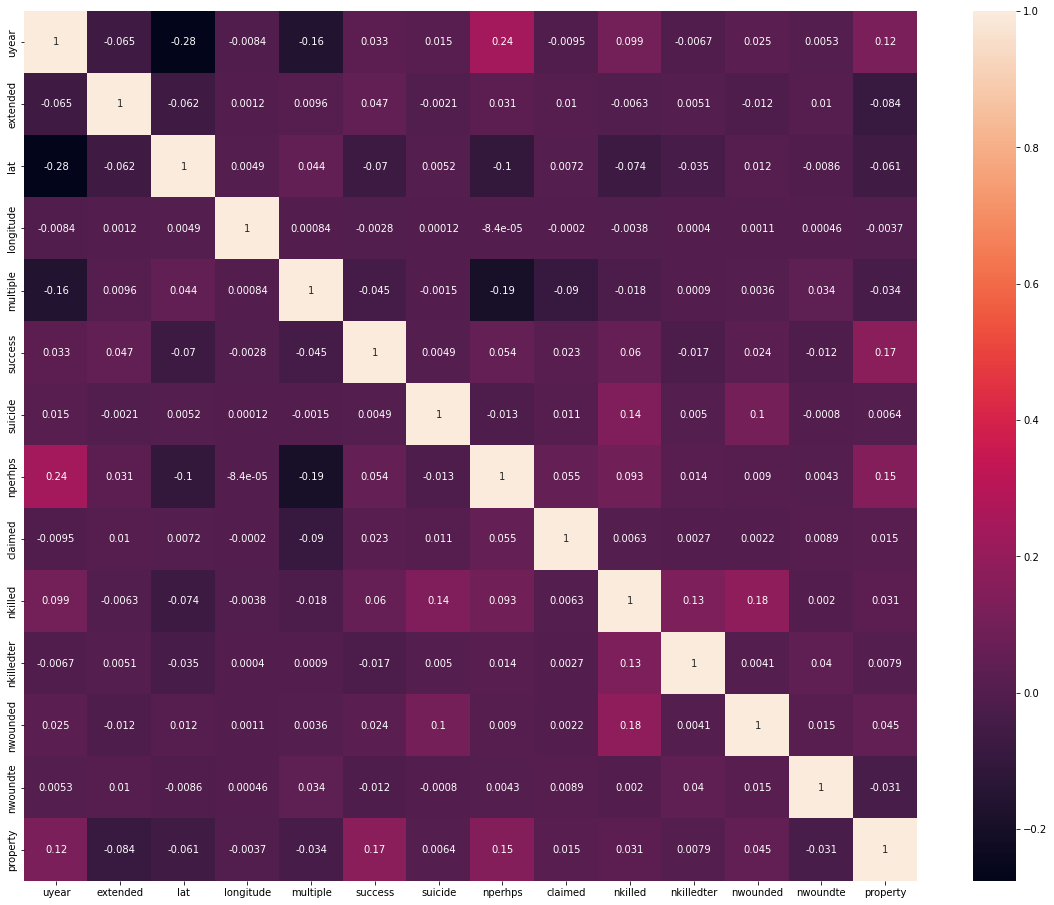

In [105]:
fig,axes = plt.subplots(1,1,figsize=(20,16))
sns.heatmap(df.corr(), annot =True)
plt.show()

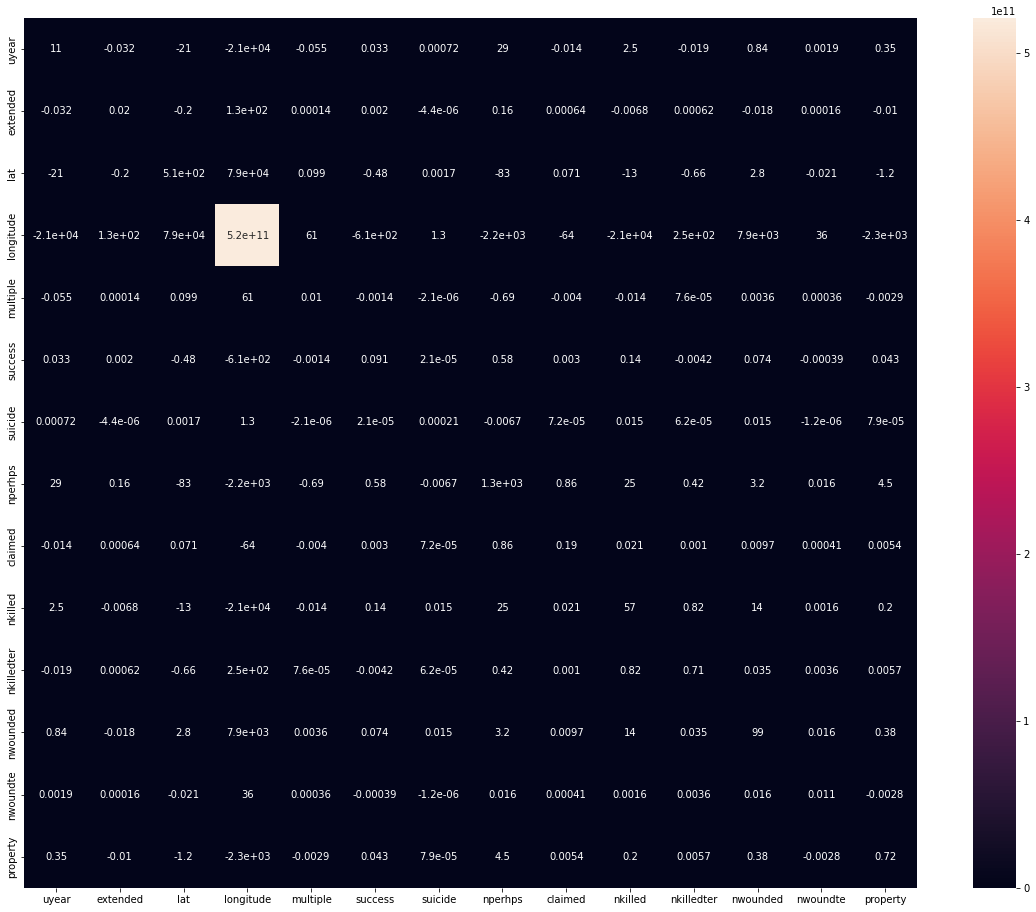

In [106]:
fig,axes = plt.subplots(1,1,figsize=(20,16))
sns.heatmap(df.cov(), annot =True)
plt.show()

pie chart of attack type

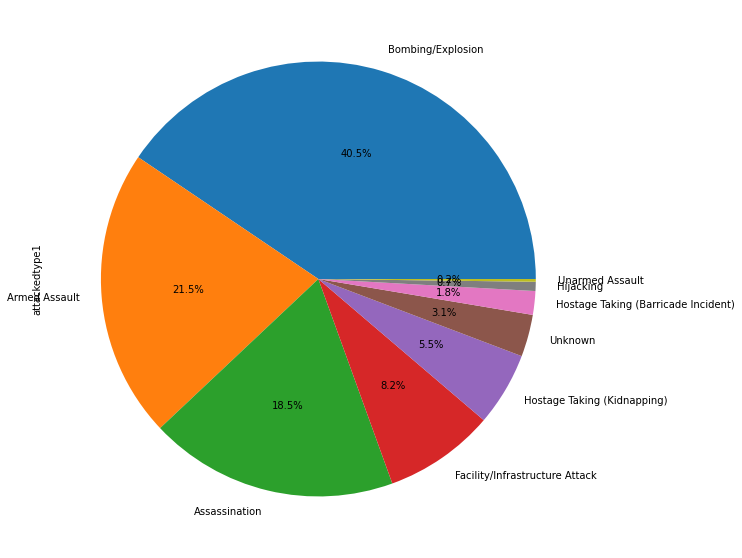

In [107]:
plt.figure(figsize=(10,10))
df['attackedtype1'].value_counts().plot.pie(autopct ="%1.1f%%")
plt.show()

weapon used

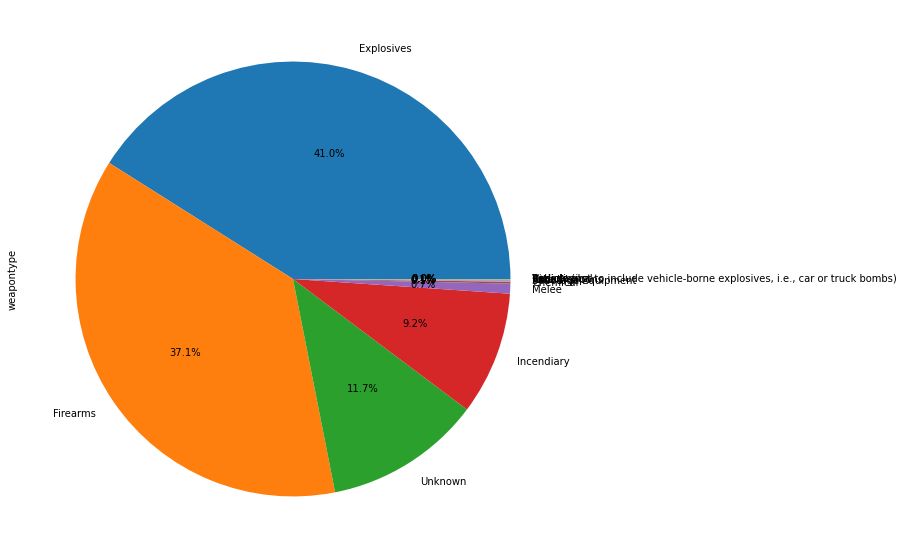

In [108]:
plt.figure(figsize=(10,10))
df['weapontype'].value_counts().plot.pie(autopct ="%1.1f%%")
plt.show()

Regions

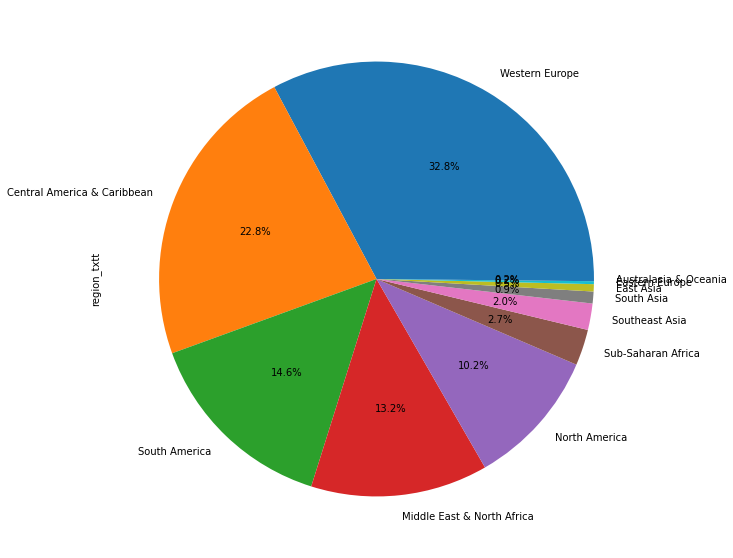

In [109]:
plt.figure(figsize=(10,10))
df['region_txtt'].value_counts().plot.pie(autopct ="%1.1f%%")
plt.show()

Terrorist activities

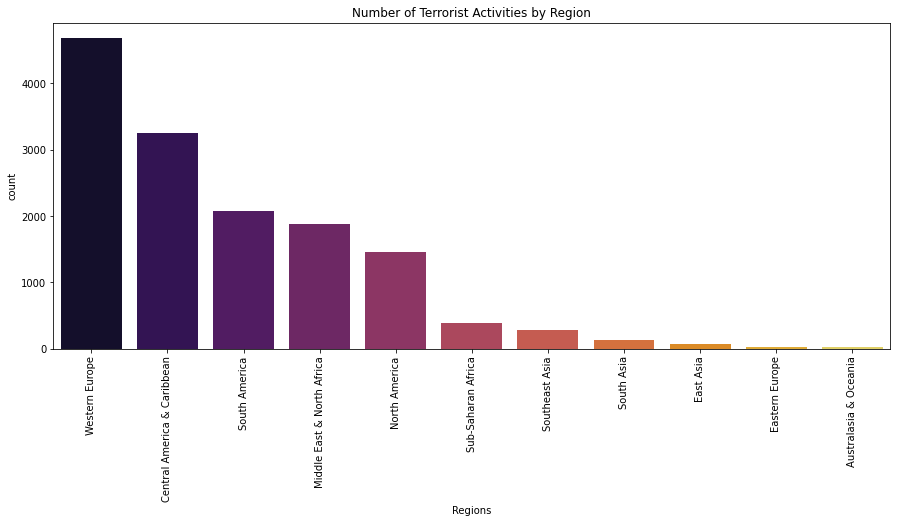

In [110]:
plt.subplots(figsize =(15,6))
sns.countplot('region_txtt',data=df,palette='inferno',order=df['region_txtt'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.title('Number of Terrorist Activities by Region')
plt.show()

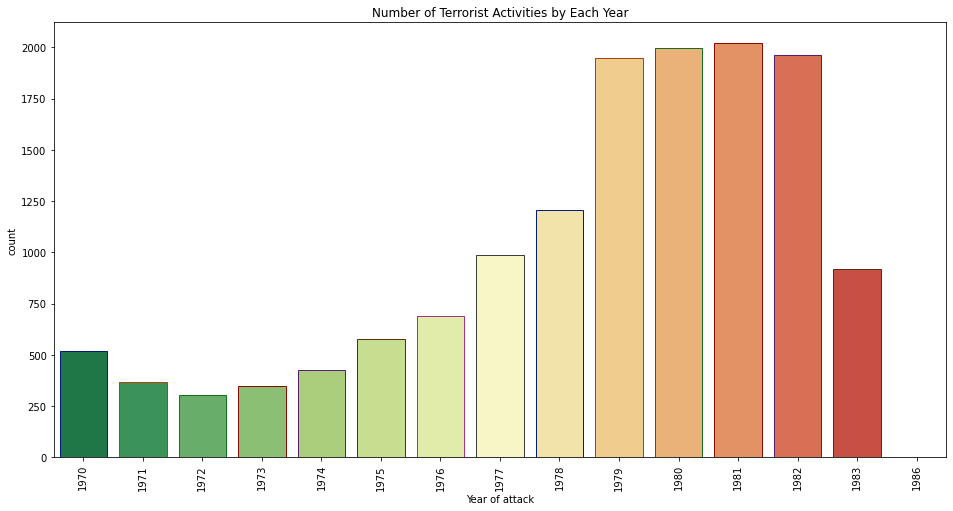

In [111]:
plt.subplots(figsize =(16,8))
sns.countplot('uyear',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',8))
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number of Terrorist Activities by Each Year')
plt.show()

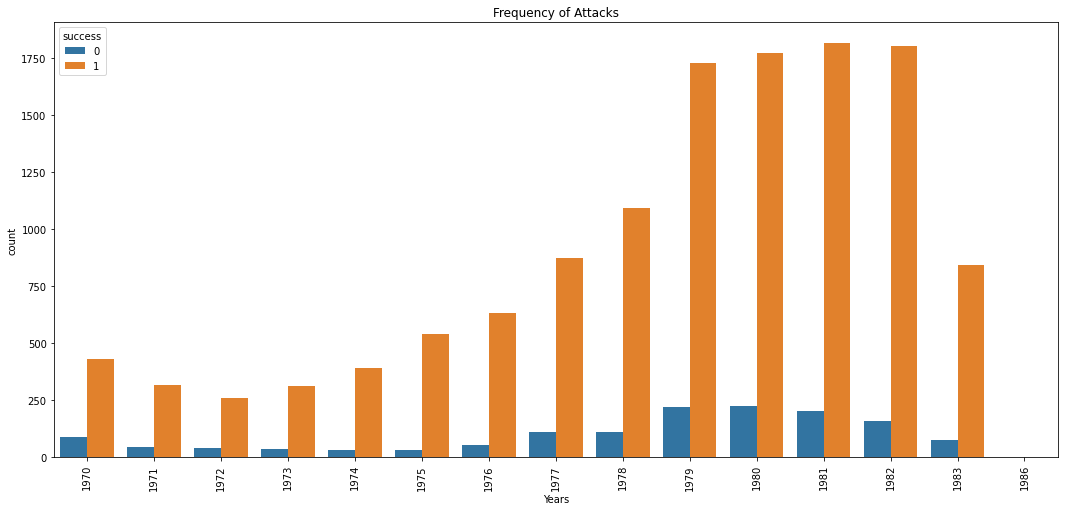

In [112]:
plt.subplots(figsize =(18,8))
sns.countplot(x=df['uyear'], hue ='success', data = df)
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.title('Frequency of Attacks')
plt.show()

attacking method

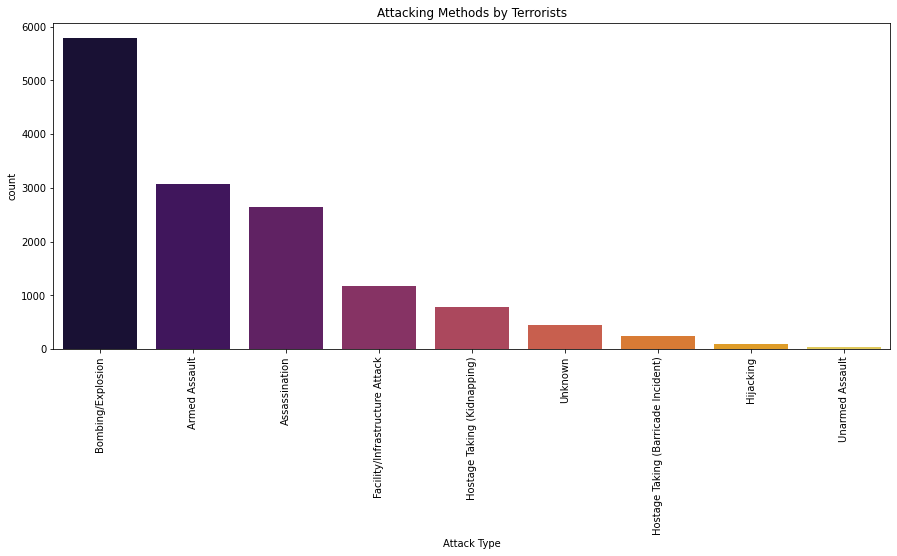

In [113]:
plt.subplots(figsize =(15,6))
sns.countplot('attackedtype1',data=df,palette='inferno',order=df['attackedtype1'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Attack Type')
plt.title('Attacking Methods by Terrorists')
plt.show()

weapon used by terrorist

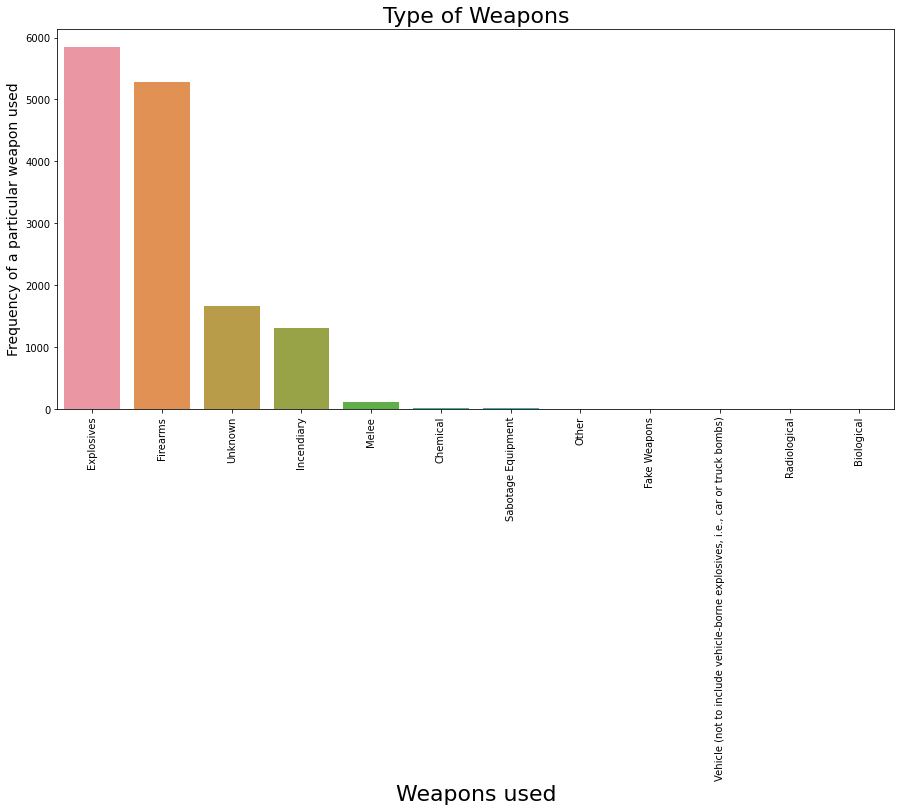

In [114]:
plt.figure(figsize =(15,7))
sns.barplot(x=df['weapontype'].value_counts()[:50].index,y =df['weapontype'].value_counts()[:50].values)
plt.xticks(rotation=90)
plt.xlabel('Weapons used', fontsize =22)
plt.ylabel("Frequency of a particular weapon used", fontsize =14)
plt.title("Type of Weapons", fontsize =22)
plt.show()

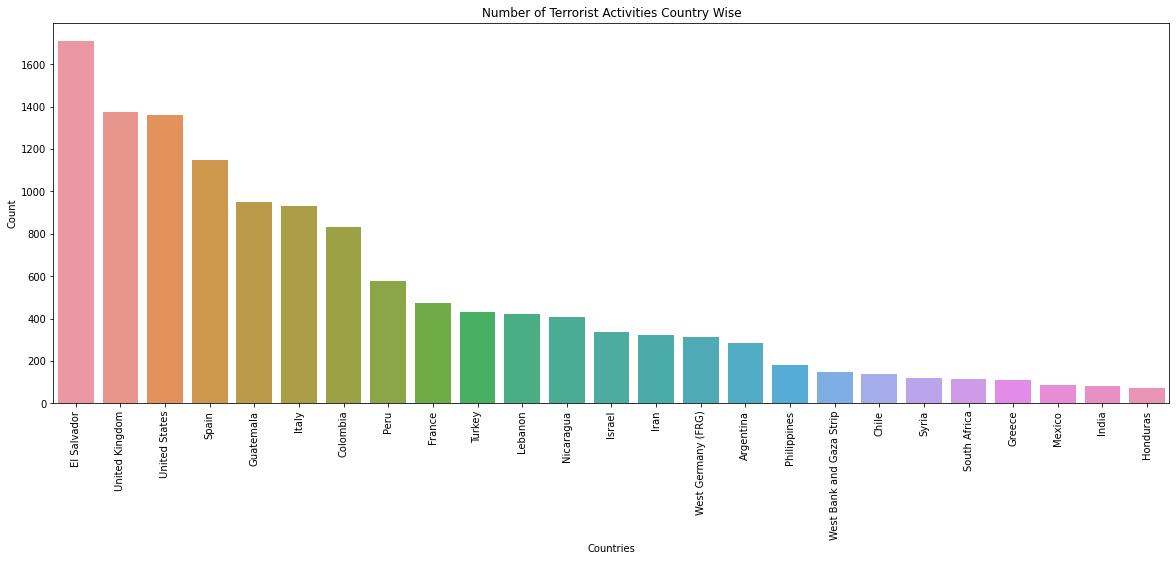

In [115]:
plt.figure(figsize =(20,7))
sns.barplot(x=df['country_txtt'].value_counts()[:25].index,y =df['country_txtt'].value_counts()[:25].values)
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title("Number of Terrorist Activities Country Wise")
plt.show()

Text(0.5, 1.0, 'Number of Terrorist Activities Regionwise')

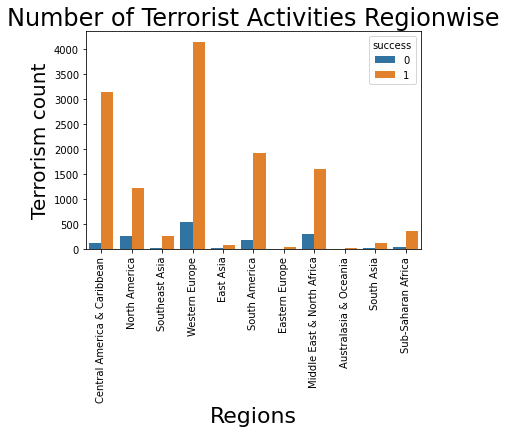

In [116]:
sns.countplot(x=df['region_txtt'], hue ='success', data=df)
plt.xlabel("Regions", fontsize =22)
plt.xticks(rotation=90)
plt.ylabel("Terrorism count", fontsize =20)
plt.title("Number of Terrorist Activities Regionwise", fontsize =24)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1cbbb75210>,
      dtype=object)

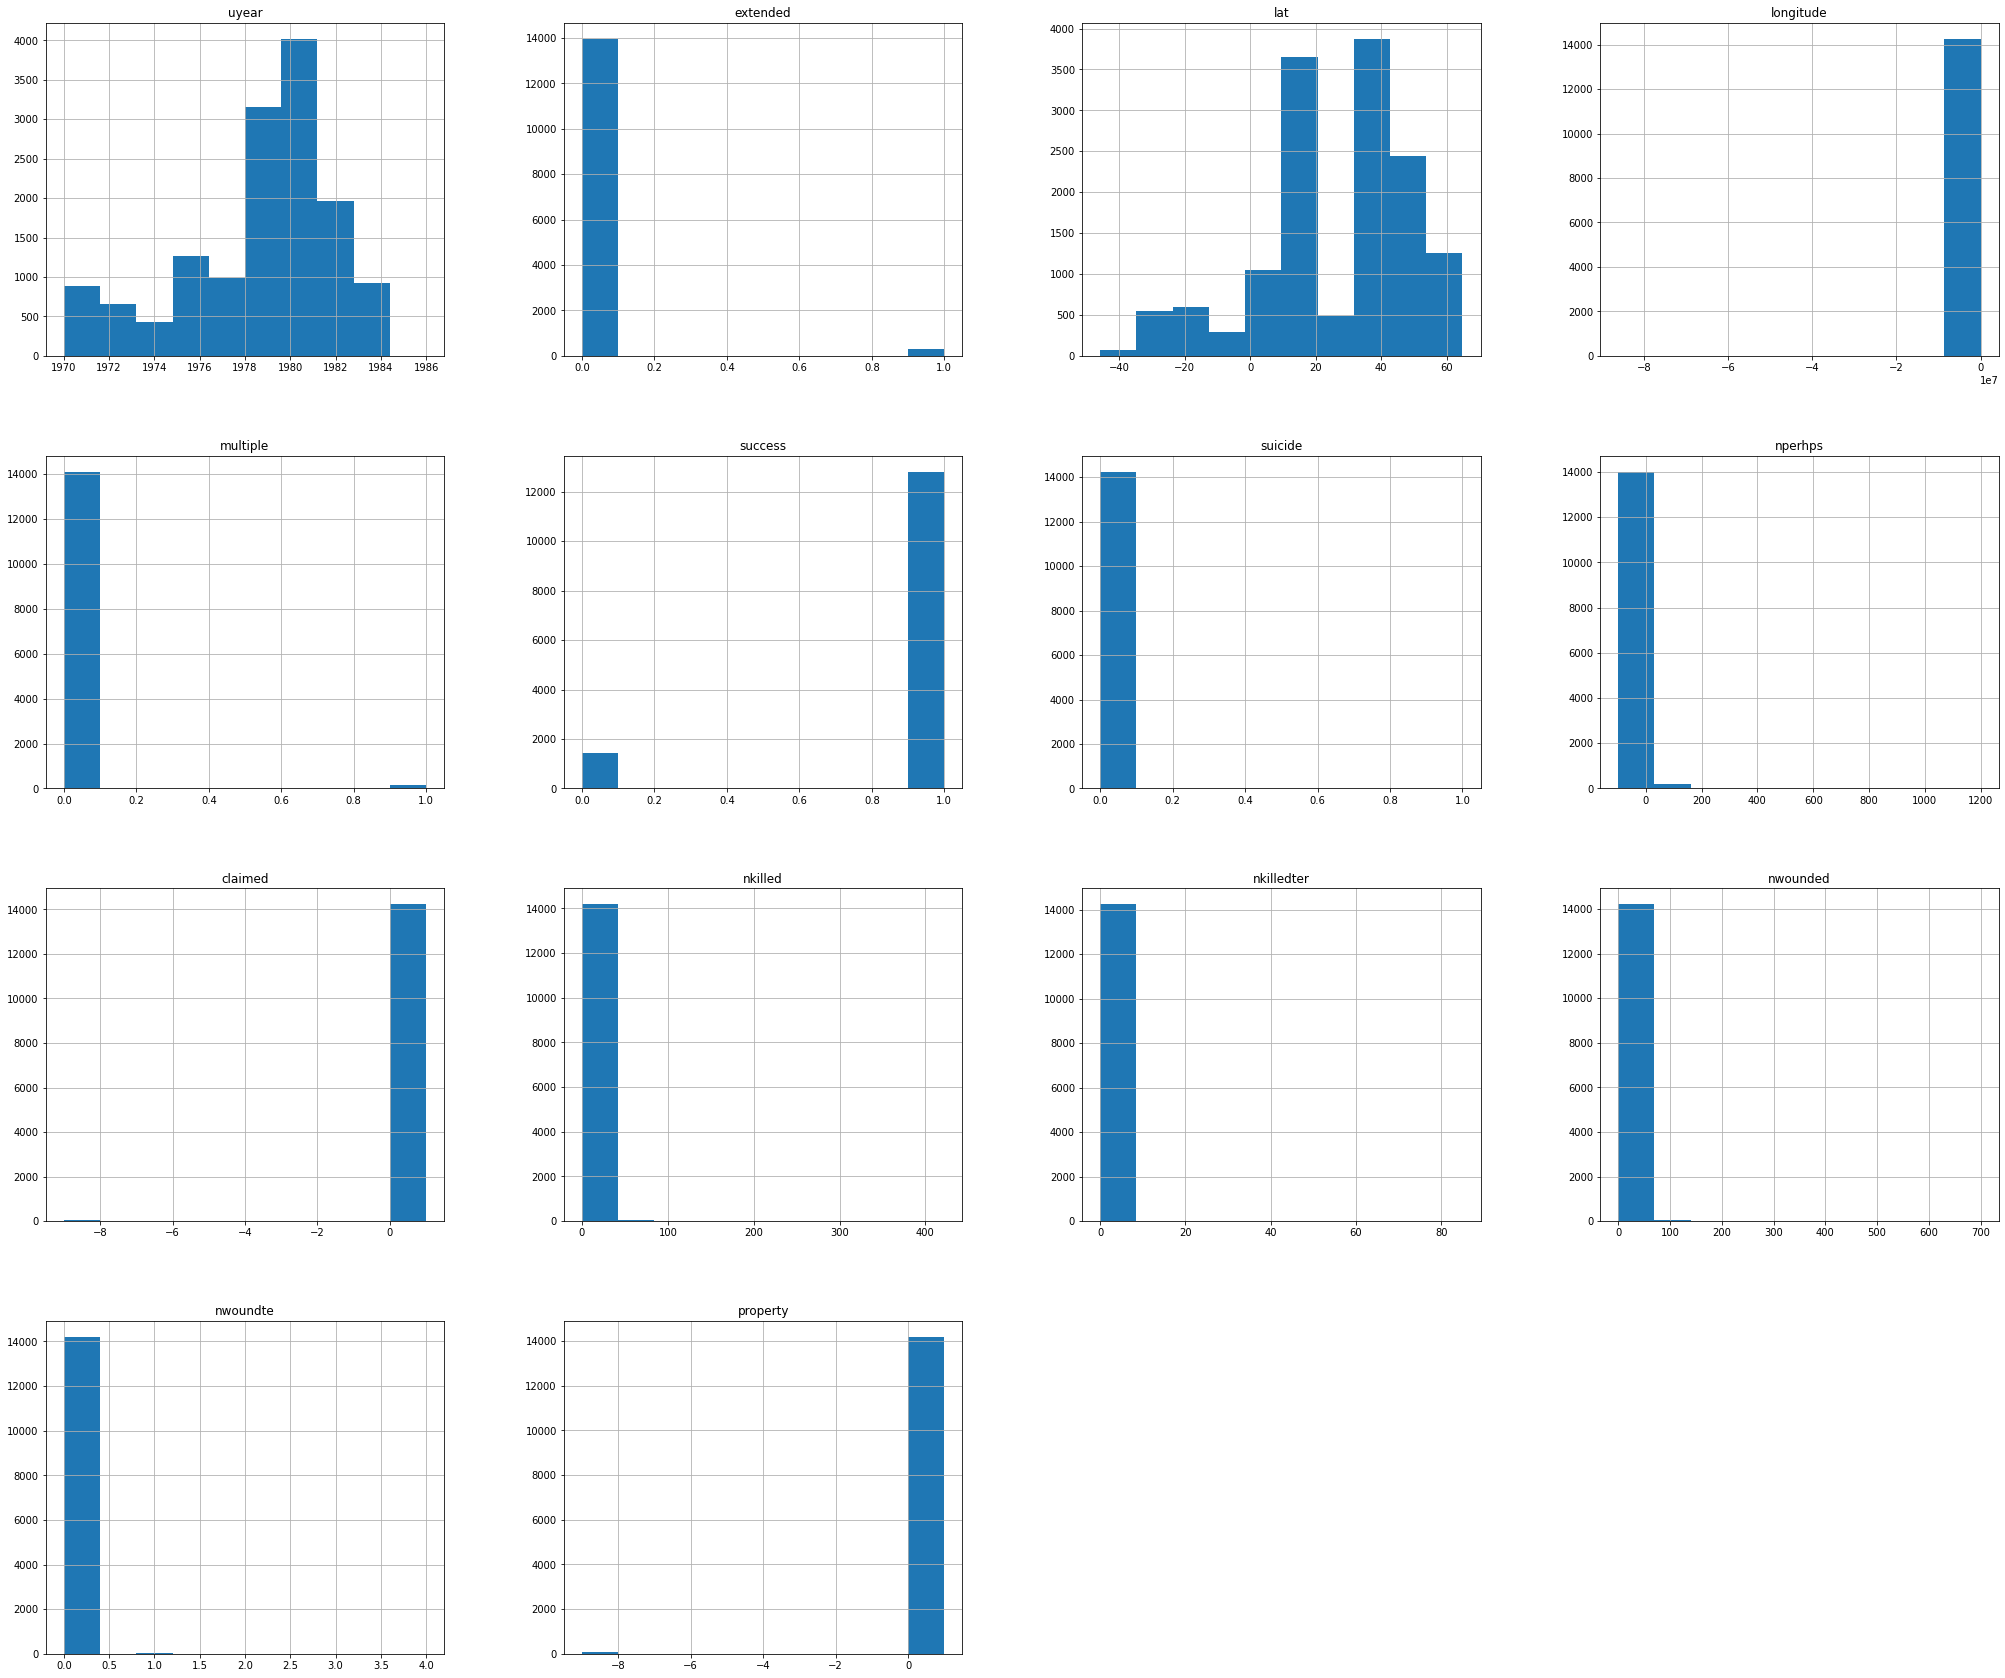

In [117]:
df.hist(figsize =(35,30))

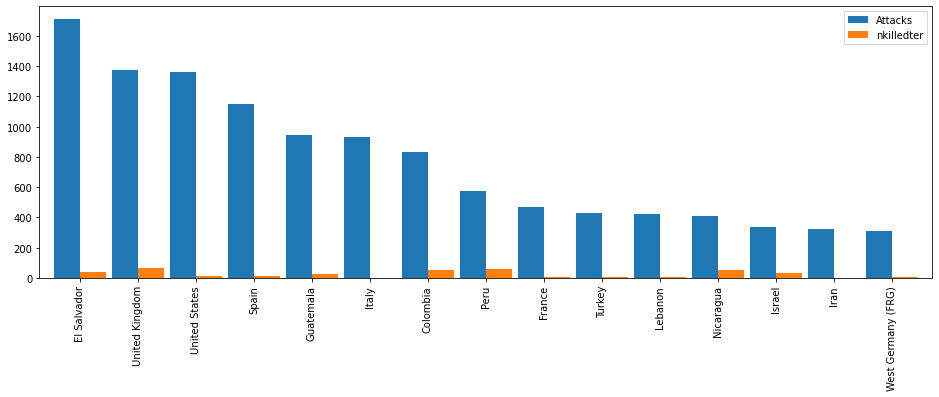

In [119]:
count_terror =df['country_txtt'].value_counts()[:15].to_frame()
count_terror.columns=['Attacks']
count_kill =df.groupby('country_txtt')['nkilledter'].sum().to_frame()
count_terror.merge(count_kill,left_index =True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(16,5)
plt.show()